# Global Health Data Decision Tree

In [195]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sqlalchemy import create_engine
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Load Data Set

In [196]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [197]:
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Exploratory Data Analysis

In [15]:
ProfileReport(life_df)

Number of variables,22
Number of observations,2938
Total Missing (%),3.9%
Total size in memory,505.1 KiB
Average record size in memory,176.0 B
Numeric,18
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [99]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [100]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [85]:
life_df.values

array([['Afghanistan', 2015, 'Developing', ..., 17.3, 0.479, 10.1],
       ['Afghanistan', 2014, 'Developing', ..., 17.5, 0.476, 10.0],
       ['Afghanistan', 2013, 'Developing', ..., 17.7, 0.47, 9.9],
       ...,
       ['Zimbabwe', 2002, 'Developing', ..., 1.3, 0.427, 10.0],
       ['Zimbabwe', 2001, 'Developing', ..., 1.7, 0.427, 9.8],
       ['Zimbabwe', 2000, 'Developing', ..., 11.2, 0.434, 9.8]],
      dtype=object)

In [125]:
#Deal with the error: 
                    #ValueError: Input contains NaN, infinity or a value too large for dtype('float32'). 
#import numpy as np
# np.where(life_df['Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'Polio', 
  #               'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
  #               'Income composition of resources'].values >= np.finfo(np.float64).max)

### Target Variables
- Life expectancy
- Adult Mortality
- Status (categorical)

### Feature Variables
- infant deaths
- Alcohol
- percentage expenditure
- Hepatitis B
- Measles
- BMI 
- under-five deaths
- Polio
- Total expenditure

- Diphtheria
- HIV/AIDS
- GDP (could also be target variable) 
- Population
- thinness  1-19 years
- thinness 5-9 years
- Income composition of resources
- Schooling

In [34]:
print("Data Set Length", len(life_df))

Data Set Length 2938


In [142]:
life_df.replace([np.inf, -np.inf], np.nan)
life_df = life_df.dropna()

In [117]:
#life_df.iloc('Inf', 'inf','INF', INF, inf,Inf)
life_df.index[np.isinf(life_df).any(1)]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [118]:
#life_df.columns.to_series()[np.isinf(life_df).any()]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [143]:
#Convert 'GDP' to numeric
life_df['GDP'] = pd.to_numeric(life_df['GDP'], errors='coerce')
print(life_df['GDP'])

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 1649, dtype: float64


In [171]:
#Define a Classifier Via Condition

def is_investing (life_expectancy):
    developed = False
    if life_expectancy>= 65:
        developed == True
    elif life_expectancy < 65:
        developed == False
    return developed
is_investing(70)    

False

In [169]:
def is_investing(Life expectancy ):
    developed = False
    if Life expectancy >== 65:
        developed == True
    elif Life expectancy < 65:
        developed == False
    return developed

is_investing(70)

SyntaxError: invalid syntax (<ipython-input-169-562e4fd8d9d1>, line 1)

## Decision Tree

### This is the Classification model.

from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

1) Separate the Data
2) Split data by using Train/Test
3) Fit the model using x_train and y_train
4) Function to perform training with Entropy
5) Create a variable to store the predictions using the x_test data
6) Get the accuracy by passing y_test and predictions into the .score() function

In [173]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import 
from sklearn.metrics import accuracy_score

In [145]:
#Create a list of features
features = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling']

In [147]:
X = life_df.iloc[:,[4,6,7,8,9,10,11,12,13,14,15,18,19]]  #Features
y = life_df.iloc[:,[2]]         #Target variable is 'Status'  and can also be 'Life expectancy ' 

#Split data to train and test with 20% sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state =5)

#Select Classifier
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 5, max_depth =3, min_samples_leaf =5)
    #clf_is_investing = DecisionTreeClassifier(criterion = "Life expectancy ", random_state = 5, max_depth =3, min_samples_leaf =5)
    #clf_is_investing.fit(X_train,y_train)
    
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [183]:
X_train.shape

(1319, 13)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

terrible_clf = KNeighborsClassifier(n_neighbors=1)

terrible_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [187]:
terrible_clf.score(X_train, y_train)

1.0

In [188]:
terrible_clf.score(X_test, y_test)

0.8818181818181818

In [184]:
X_test.shape

(330, 13)

In [185]:
X.shape

(1649, 13)

In [178]:
clf.score(X_train, y_train)

0.9529946929492039

In [179]:
clf.score(X_test, y_test) 
#accuracy for 

0.9424242424242424

In [ ]:
y_test.apply()

In [190]:
accuracy_score(y_test, terrible_clf.predict(X_test))

0.8818181818181818

In [191]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.9424242424242424


## Decision Tree Visualization

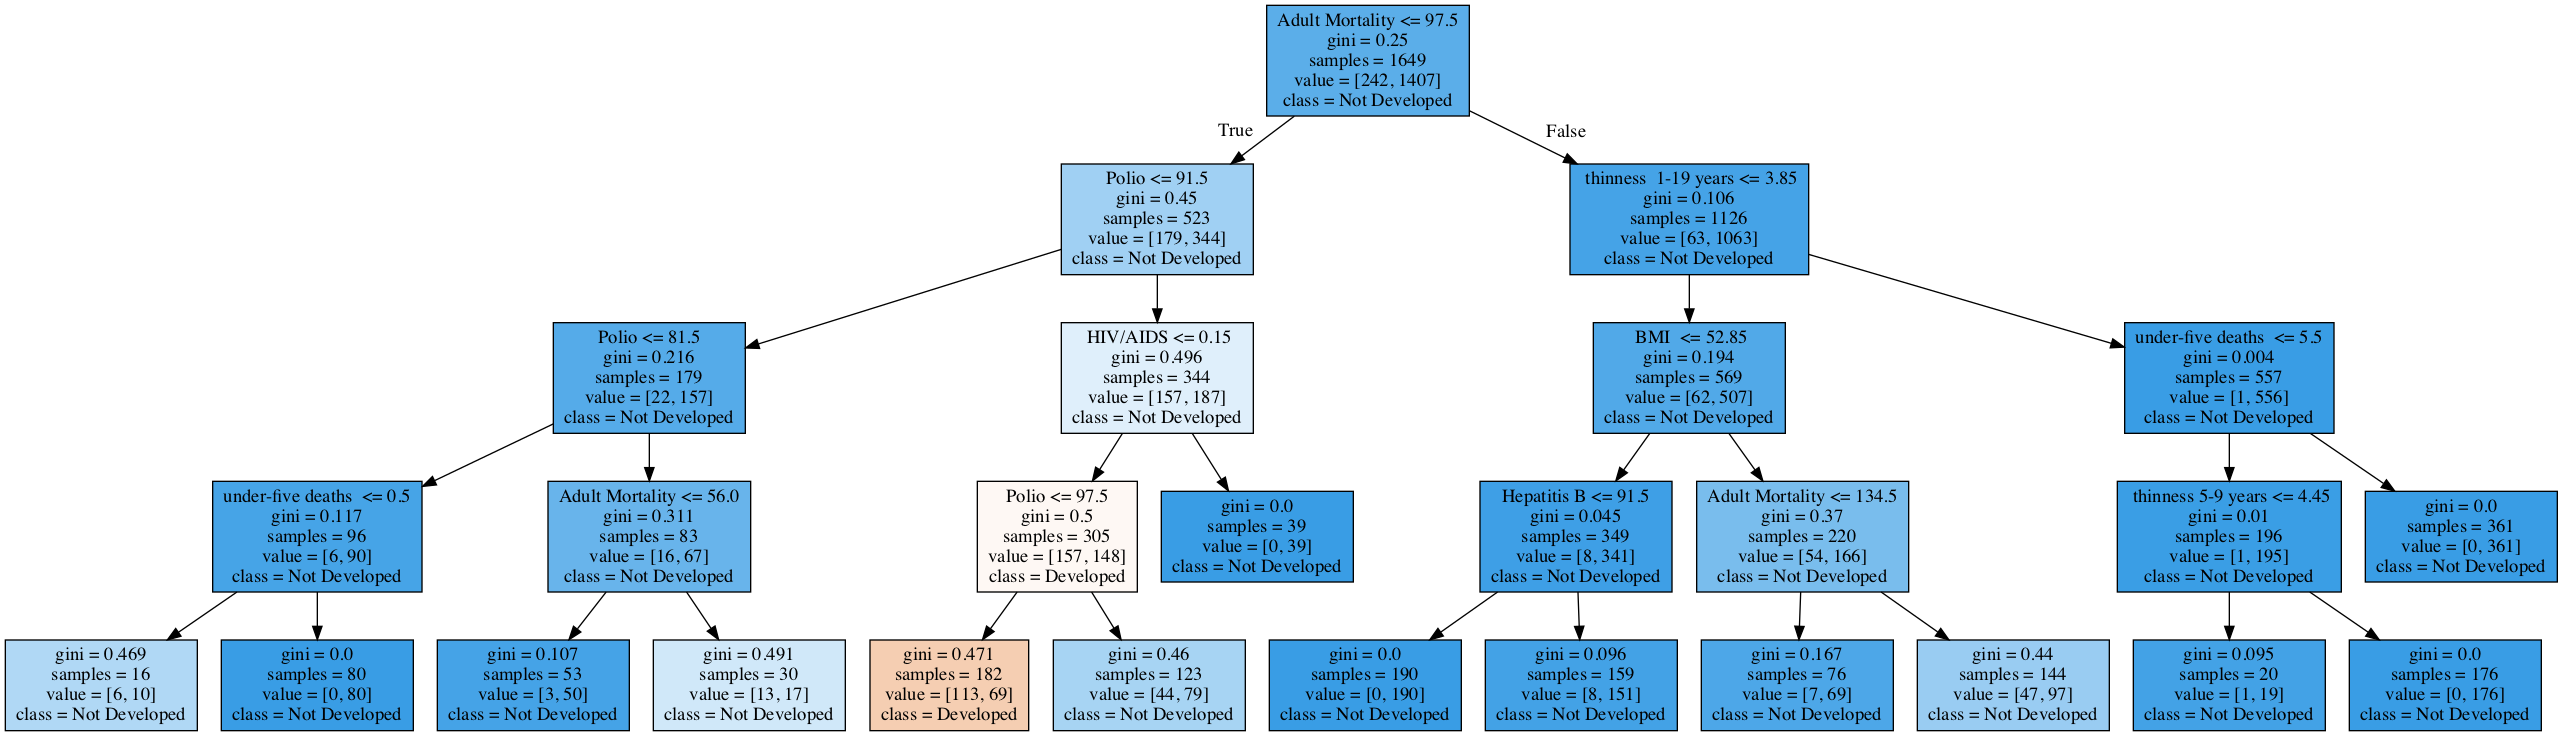

In [155]:
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Developed', 'Not Developed'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## This is the Random Forest model
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)


In [198]:
from sklearn import ensemble

In [192]:
categorical = life_df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Country
193
Status
2


In [202]:
life_df2.columns

Index(['Country', 'Year', 'Status', 'infant deaths', 'percentage expenditure',
       'Measles ', 'under-five deaths ', ' HIV/AIDS'],
      dtype='object')

In [204]:
rfc = ensemble.RandomForestClassifier()

life_df2 = life_df.dropna(axis=0)

X = life_df2[['Alcohol', 'percentage expenditure', 'Hepatitis B',
                 'Measles ', ' BMI ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                 'Income composition of resources', 'Schooling']]
Y = life_df2['Status']
X = pd.get_dummies(X)


#X = life_df.iloc[:,[4,6,7,8,9,10,11,12,13,14,15,18,19]]  #Features
#y = life_df.iloc[:,[2]]         #Target variable is 'Status'  and can also be 'Life expectancy ' 

#Split data to train and test with 20% sample w/only one model

In [206]:
X

,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,0.407,9.2
2934,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,0.418,9.5
2935,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,0.427,10.0
2936,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,0.427,9.8


In [208]:
rfc.fit(X_train,y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [210]:
rfc.score(X_train,y_train)  

0.9984836997725549

In [212]:
rfc.score(X_test,y_test)

0.9666666666666667